## The Stokes flow (with cylinder)

### (1) Problem Description
#### (1.1) The governing equation 
The governing PDE is
\begin{equation}
\begin{split}
 -\mu\nabla^2{\bf u} + \nabla p &={\bf 0}, \quad \text{in}\ \Omega \\
   \nabla\cdot {\bf u} &= 0,\quad \text{in}\ \Omega
\end{split}
\end{equation}
where $p(N/m^2)$ is the pressure, ${\bf u} (m/s)$ is the velocity vector, ${\bf f}$ is the applied body force, $\mu$ is the dynamic viscosity.
A typical set of boundary conditions on the boundary $\partial\Omega = \Gamma_D\cup \Gamma_N$ can be:
\begin{equation}
\begin{split}
 {\bf u} = {\bf u}_0, \quad \text{on}\ \Gamma_D \\
(\nabla\cdot{\bf u}+p)\cdot\vec{n} = g\quad \text{on}\ \Gamma_N
\end{split}
\end{equation}
#### (1.2) The continuum and constitutive formulations
\begin{equation}
\begin{split}
- \nabla\cdot {\bf \sigma}  &= {\bf f}, \quad \text{in}\ \Omega \\
   \nabla\cdot {\bf u} &= 0,\quad \text{in}\ \Omega 
\end{split}
\end{equation}
where 
\begin{equation}
{\bf \sigma} = -p{\bf I} + \mu(\nabla{\bf u}+\nabla{\bf u}^T) 
\end{equation}
is the Cauchy stress tensor, and $p=-tr({\bf \sigma})/2$.
#### (1.3) The weak form
\begin{equation}
\begin{split}
\int {\bf \sigma} \cdot\nabla^T\psi ~dx =  \int {\bf f}\psi~dx
\end{split}
\end{equation}
where 
\begin{equation}
{\bf \sigma} = -p{\bf I} + \mu(\nabla{\bf u}+\nabla{\bf u}^T) ,
\end{equation}
and $p=-tr({\bf \sigma})/2$.
#### (1.4) The problem
The domain is given in the following figure, and the initial/boundary conditions are given as:
- **In flow:** ${\bf u}=(a, 0)$
- **Out flow:** $p=0$
- **non-slip wall:** ${\bf u}={\bf 0}$
- **Cylinder:** ${\bf u=0}$
  
For the parameters in the equation, we set  $\mu=0.01$. Our goal is to learn the following map:
$$
\mathcal{G}: a(x)\longrightarrow (\textbf{u}, p)
$$

#### (1.5) 
\begin{equation}
\begin{split} 
 - \mu
\left[
\begin{matrix}
u_{xx}+u_{yy}\\
v_{xx}+v_{yy}
\end{matrix}
\right] +
\left[
\begin{matrix}
p_x \\
p_y
\end{matrix}
\right]
= 
\left[
\begin{matrix}
f_1 \\
f_2
\end{matrix}
\right]
\end{split}
\end{equation}
The corresponding weak form is
\begin{equation}
\begin{split}
\mu\int\nabla u\cdot\nabla\psi_1~d\Omega - \int p\frac{\partial \psi_1}{\partial x} ~d\Omega &= \int f_1\psi_1~d\Omega \\
\mu\int\nabla v\cdot\nabla\psi_2~d\Omega - \int p\frac{\partial \psi_2}{\partial y} ~d\Omega &= \int f_2\psi_2~d\Omega 
\end{split}
\end{equation}
#### (1.6)
\begin{equation}
\begin{split}
-
\left[
\begin{matrix}
\frac{\partial \sigma_{11}}{\partial x} + \frac{\partial \sigma_{21}}{\partial y}  \\
\frac{\partial \sigma_{12}}{\partial x} + \frac{\partial \sigma_{22}}{\partial y}
\end{matrix}
\right] =
\left[
\begin{matrix}
f_1 \\
f_2
\end{matrix}
\right]
\end{split}
\end{equation}
The corresponding weak form is
\begin{equation}
\begin{split}
\int (\sigma_{11}\frac{\partial \psi_1}{\partial x}+\sigma_{21}\frac{\partial \psi_1}{\partial y})~d\Omega &= \int f_1\psi_1~d\Omega \\
\int (\sigma_{12}\frac{\partial \psi_2}{\partial x}+\sigma_{22}\frac{\partial \psi_2}{\partial y})~d\Omega  &= \int f_2\psi_2~d\Omega 
\end{split}
\end{equation}

### (2) Prepare data

The shape of uvp_train: torch.Size([1000, 1708, 3])
The shape of x_train: torch.Size([1000, 1708, 2])
***********************************
The shape of uvp_test: torch.Size([200, 1708, 3])
The shape of x_test: torch.Size([200, 1708, 2])
The shape of gridx: torch.Size([1708, 2])
***********************************
The shape of a_train: torch.Size([1000, 256, 1])
The shape of a_test: torch.Size([200, 256, 1])
***********************************
x_inflow shape torch.Size([256, 2])
x_outflow shape torch.Size([256, 2])
x_wall shape: torch.Size([768, 2])


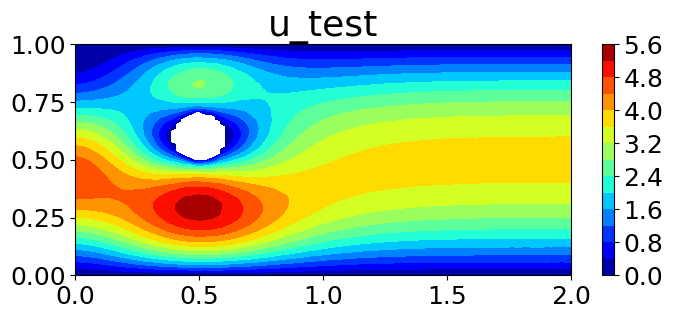

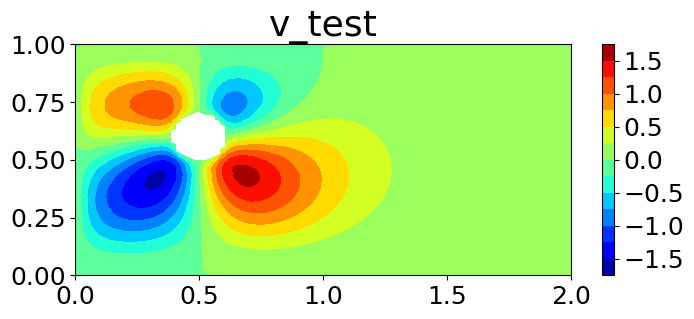

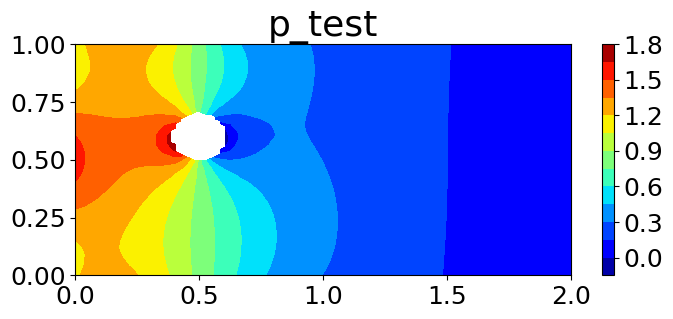

In [1]:
import sys 
sys.path.append("..") 
import numpy as np
import h5py
import torch 
import random
import matplotlib.pyplot as plt
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True
random_seed = 10086
setup_seed(random_seed)
device = 'cuda:1'
dtype = torch.float32

####################################
# Load data
####################################
from Utils.utils import *
def get_data(data, dtype):
    u = np2tensor(np.array(data["u"]), dtype)
    v = np2tensor(np.array(data["v"]), dtype)
    p = np2tensor(np.array(data["p"]), dtype)
    gridx = np2tensor(np.array(data["gridx"]), dtype)
    #
    beta1 = np2tensor(np.array(data["beta1"]), dtype)
    beta2 = np2tensor(np.array(data["beta2"]), dtype)
    #
    ndata = u.shape[0]
    u = u.reshape(ndata, -1, 1)
    v = v.reshape(ndata, -1, 1)
    p = p.reshape(ndata, -1, 1)
    uvp = torch.cat([u,v,p], dim=-1)
    x = gridx.repeat((ndata, 1, 1))
    
    return uvp, x, gridx, beta1, beta2
#
data_train = h5py.File('dataset/stokesHole_train.mat', 'r')
data_test = h5py.File('dataset/stokesHole_test_in.mat', 'r')
uvp_train, x_train, gridx, beta1_train, beta2_train = get_data(data_train, dtype)
uvp_test, x_test, gridx, beta1_test, beta2_test = get_data(data_test, dtype)
#
print('The shape of uvp_train:', uvp_train.shape)
print('The shape of x_train:', x_train.shape)
print('***********************************')
print('The shape of uvp_test:', uvp_test.shape)
print('The shape of x_test:', x_test.shape)
print('The shape of gridx:', gridx.shape)

################################
# Obtain the coefficient (Inputs)
################################
class Exact_a(object):
    def __init__(self, beta1, beta2):
        self.beta1 = beta1.reshape(-1, 1, 1)
        self.beta2 = beta2.reshape(-1, 1, 1)
        
    def __call__(self, x):
        xx, yy = x[...,0:1], x[...,1:2]
        a = 2. * torch.sin(np.pi * yy)
        a = a*(1. + torch.sin(self.beta1 * yy) + torch.cos(self.beta2 * yy))
        return a
#
x_inflow = torch.zeros((256, 2))
x_inflow[:,1] = torch.linspace(0.,1.,256)
#
train_a = Exact_a(beta1_train, beta2_train)
a_train = train_a(x_inflow.repeat(x_train.shape[0],1,1))
#
test_a = Exact_a(beta1_test, beta2_test)
a_test = test_a(x_inflow.repeat(x_test.shape[0],1,1))
print('***********************************')
print('The shape of a_train:', a_train.shape)
print('The shape of a_test:', a_test.shape)

######################################
# Boundary points
######################################
from Utils.GenPoints import Point2D
pointGen = Point2D(x_lb=[0., 0.], x_ub=[2., 1.], dataType=dtype, random_seed=random_seed)
N_bd_each_edge = 256
x_bd_train = pointGen.boundary_point(num_each_edge=N_bd_each_edge, method='mesh')
#
x_lt = x_bd_train[0:N_bd_each_edge]
x_rt = x_bd_train[N_bd_each_edge:2*N_bd_each_edge]
x_bt = x_bd_train[2*N_bd_each_edge:3*N_bd_each_edge]
x_up = x_bd_train[3*N_bd_each_edge:]
x_cld = pointGen.boundary_point_sphere(N_bd_each_edge, xc=[0.5,0.6], radius=0.1, method='mesh')
#
x_inflow = x_lt
x_outflow = x_rt
x_wall = torch.cat((x_up, x_bt, x_cld), axis=0)
print('***********************************')
print('x_inflow shape', x_inflow.shape)
print('x_outflow shape', x_outflow.shape)
print('x_wall shape:', x_wall.shape)
#
# plt.figure()
# plt.scatter(x_inflow[:,0], x_inflow[:,1], label='in flow')
# plt.scatter(x_outflow[:,0], x_outflow[:,1], label='out flow')
# plt.scatter(x_wall[:,0], x_wall[:,1], label='walls')
# plt.legend()
# plt.show()

# #######################################
from Utils.PlotFigure import Plot
from scipy.interpolate import griddata
#
inx = 0
xx, yy = np.meshgrid(np.linspace(0, 2.,100), np.linspace(0., 1., 100))
#
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(uvp_test[inx,:,0]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr0 = axs.contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs.set_title('u_test')
plt.colorbar(cntr0, ax=axs)
#
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(uvp_test[inx,:,1]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr1 = axs.contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs.set_title('v_test')
plt.colorbar(cntr1, ax=axs)
#
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(uvp_test[inx,:,2]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr2 = axs.contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs.set_title('p_test')
plt.colorbar(cntr2, ax=axs)

### (3) Define the loss class

In [2]:
import torch.nn as nn
from torch.autograd import grad, Variable
from Utils.TestFun_ParticleWNN import TestFun_ParticleWNN
###############################
# The test function
###############################
int_grid, phi, dphi_dr = TestFun_ParticleWNN(
    fun_type='Wendland', dim=2, n_mesh_or_grid=8, dataType=dtype).get_testFun()
print('The shape of int_grid', int_grid.shape, 'The shape of phi:', phi.shape)
# For generating refinement "particles"
refineGen = Point2D(x_lb=[0.3, 0.4], x_ub=[0.7, 0.8], dataType=dtype, random_seed=random_seed)

#################################  
class LossClass(object):

    def __init__(self, solver):
        super(LossClass, self).__init__()
        self.solver = solver
        self.device = self.solver.device
        self.dtype = self.solver.dtype
        self.model_psi = solver.model_dict['psi']
        self.model_p = solver.model_dict['p']
        self.model_s = solver.model_dict['s']
        self.model_enc = solver.model_dict['enc']
        ######################## 
        self.int_grid = int_grid.to(self.device)
        self.n_grid = int_grid.shape[0]
        self.phi = phi.to(self.device)
        self.dphi_dr = dphi_dr.to(self.device)
        #########################
        self.solver.getLoss = torch.nn.MSELoss()

    def get_values(self, x, beta, all_values=True):
        psi = self.model_psi(x, beta).unsqueeze(-1)
        dpsi = grad(inputs=x, outputs=psi, grad_outputs=torch.ones_like(psi), 
                    create_graph=True)[0]
        u, v = dpsi[...,1:2], -dpsi[...,0:1]
        p = self.model_p(x, beta).unsqueeze(-1)
        #
        if all_values:
            s = self.model_s(x, beta.unsqueeze(-1))
            s11, s22, s12 = s[...,0:1], s[...,1:2], s[...,2:3]
            return u, v, p, s11, s22, s12
        else:
            return u, v, p

    def get_particles(self, n_particle=200, n_refine=56):
        '''Sample 'particles' (centers of compact supports) for test functions 
        '''
        xc_in, R_in = pointGen.weight_centers(n_center=n_particle, R_max=1e-4, R_min=1e-4)
        xc_refine, R_refine = refineGen.weight_centers(n_center=n_refine, R_max=1e-4, R_min=1e-4)
        xc_in = torch.cat((xc_in, xc_refine), axis=0)
        R_in = torch.cat((R_in, R_refine), axis=0)
        index_hole = torch.where(torch.linalg.norm(xc_in.reshape(-1,2)-torch.tensor([0.5,0.6]), 
                                                   axis=1, keepdims=True)<=0.1+1e-8)[0]
        index = [i for i in range(xc_in.shape[0]) if i not in index_hole]
        
        return xc_in[index], R_in[index]

    def Loss_pde(self, a_batch, mu=0.01):
        beta = self.model_enc(a_batch)
        n_batch = a_batch.shape[0]
        ############### Data points ###############
        # # # xc:size(nc, 1, 2) R:size(nc, 1, 1)
        xc, R = self.get_particles()
        xc, R = xc.to(self.device), R.to(self.device)
        nc = xc.shape[0]
        # size(nc, n_grid, 2)
        x = self.int_grid * R + xc
        # size(nc*n_grid, 2) -> (n_batch, nc*n_grid, 2)
        x = x.reshape(-1, 2).repeat((n_batch,1,1))
        x = Variable(x, requires_grad=True)
        ############### Test functions #############
        phi = self.phi.repeat((nc,1,1)).reshape(-1,1)
        dphi = (self.dphi_dr / R).reshape(-1, 2)
        ################ model prediction ###########
        u, v, p, s11, s22, s12 = self.get_values(x, beta)
        #
        du = grad(inputs=x, outputs=u, grad_outputs=torch.ones_like(u), create_graph=True)[0]
        dv = grad(inputs=x, outputs=v, grad_outputs=torch.ones_like(v), create_graph=True)[0]
        #################
        # size(n_batch, nc*n_grid, 1) -> (n_batch, nc)
        res1 = (s11*dphi[...,0:1] + s12*dphi[...,1:2]).reshape(n_batch, nc, self.n_grid)
        res1 = torch.mean(res1, dim=-1)
        # size(n_batch, nc*n_grid, 1) -> (n_batch, nc)
        res2 = (s12*dphi[...,0:1] + s22*dphi[...,1:2]).reshape(n_batch, nc, self.n_grid)
        res2 = torch.mean(res2, dim=-1)
        ########################### Eq_3 & Eq_4 & Eq_5 & Eq_6
        # size(n_batch, nc*n_grid, 1) -> (n_batch, nc*n_grid)
        res3 = (-p + 2*mu*du[...,0:1] - s11).squeeze(-1)
        res4 = (-p + 2*mu*dv[...,1:2] - s22).squeeze(-1)
        res5 = (mu*(du[...,1:2]+dv[...,0:1]) - s12).squeeze(-1)
        res6 = (p + (s11+s22)/2).squeeze(-1)
        ###############################
        loss = (self.solver.getLoss(res1, torch.zeros_like(res1)) + 
                self.solver.getLoss(res2, torch.zeros_like(res2)) +
                self.solver.getLoss(res3, torch.zeros_like(res3)) +
                self.solver.getLoss(res4, torch.zeros_like(res4)) +
                self.solver.getLoss(res5, torch.zeros_like(res5)) +
                self.solver.getLoss(res6, torch.zeros_like(res6)) 
               )
    
        return loss * 10.

    def Loss_data(self, x, a, uvp):
        '''Note: uvp is not used for training
        '''
        beta = self.model_enc(a)
        loss = 0.
        ######################### The wall
        xwall = Variable(x_wall.repeat(beta.shape[0], 1, 1), 
                         requires_grad=True).to(self.device)
        u_wall, v_wall, _ = self.get_values(xwall, beta, False)
        loss += self.solver.getLoss(u_wall, torch.zeros_like(u_wall)) 
        loss += self.solver.getLoss(v_wall, torch.zeros_like(v_wall))
        ######################### The inflow
        xinflow = Variable(x_inflow.repeat(beta.shape[0],1, 1), 
                           requires_grad=True).to(self.device)
        u_inflow, v_inflow, _ = self.get_values(xinflow, beta, False)
        loss += self.solver.getLoss(u_inflow, a.to(self.device)) 
        loss += self.solver.getLoss(v_inflow, torch.zeros_like(v_inflow))
        ######################### The outflow
        xoutflow = Variable(x_outflow.repeat(beta.shape[0], 1, 1), 
                            requires_grad=True).to(self.device)
        _, _, p_outflow = self.get_values(xoutflow, beta, False)
        loss += self.solver.getLoss(p_outflow, torch.zeros_like(p_outflow))
        
        return loss * 2.
        
    def Error(self, x, a, uvp):
        beta = self.model_enc(a)
        ###########
        x = Variable(x, requires_grad=True).to(self.device)
        u_pred, v_pred, p_pred = self.get_values(x, beta, False)
        u_true, v_true, p_true = uvp[...,0:1], uvp[...,1:2], uvp[...,2:3]
        #
        error_u = self.solver.getError(u_pred, u_true)
        error_v = self.solver.getError(v_pred, v_true)
        # error_p = self.solver.getError(p_pred, p_true)
        
        return torch.tensor([error_u, error_v])

######################################
# Steups of the model
######################################
from Solvers.DGNO import DGNO
solver = DGNO.Solver(device=device, dtype=dtype)
netType = 'MultiONetBatch'
beta_size = 128
hidden_size = 100

####################################### The beta model
from Networks.EncoderNet import EncoderFCNet
class Encoder(nn.Module):
    def __init__(self, layers_beta, act_beta, dtype=None):
        super(Encoder, self).__init__()
        self.encoder = EncoderFCNet(layers_beta, act_beta, dtype=dtype)
        
    def forward(self, a):
        
        return self.encoder(a)

layers_beta, act_beta = [x_inflow.shape[0], 256, 128, beta_size], 'SiLU'
model_enc = Encoder(layers_beta, act_beta, dtype=dtype).to(device)

###################################### The u model (MultiONet)
trunk_layers, branch_layers = [hidden_size]*6, [hidden_size]*6
#
model_psi = solver.getModel(x_in_size=2, beta_in_size=beta_size, 
                          trunk_layers=trunk_layers, branch_layers=branch_layers,
                          activation_trunk='Tanh_Sin', activation_branch='Tanh_Sin',
                           netType=netType, sum_layers=5)
model_p = solver.getModel(x_in_size=2, beta_in_size=beta_size, 
                          trunk_layers=trunk_layers, branch_layers=branch_layers,
                          activation_trunk='Tanh_Sin', activation_branch='Tanh_Sin',
                           netType=netType, sum_layers=5)
#
model_s = solver.getModel(x_in_size=2, beta_in_size=1,
                          latent_size = beta_size, out_size=3,
                          trunk_layers=trunk_layers, branch_layers=branch_layers,
                          activation_trunk='Tanh_Sin', activation_branch='Tanh_Sin',
                           netType='MultiONetBatch_X', sum_layers=5)
#######################################
params_enc = sum(p.numel() for p in model_enc.parameters() if p.requires_grad)
print(f'{params_enc:,} training parameters.')
#
params_psi = sum(p.numel() for p in model_psi.parameters() if p.requires_grad)
print(f'{params_psi:,} training parameters.')
# 
params_p = sum(p.numel() for p in model_p.parameters() if p.requires_grad)
print(f'{params_p:,} training parameters.')
#
params_s = sum(p.numel() for p in model_s.parameters() if p.requires_grad)
print(f'{params_s:,} training parameters.')
#
print(f'{params_enc+params_psi+params_p+params_s:,} total training parameters.')

The shape of int_grid torch.Size([32, 2]) The shape of phi: torch.Size([32, 1])
115,200 training parameters.
114,206 training parameters.
114,206 training parameters.
101,887 training parameters.
445,499 total training parameters.


### (3) Training and make prediction

In [3]:
model_dict = {'psi':model_psi, 'p':model_p, 'enc':model_enc, 's':model_s}
solver.train_setup(model_dict, lr=5e-4, optimizer='Adam', scheduler_type='StepLR', 
                   gamma=0.5, step_size=np.int32(2000/5))
pos4error = random.sample(range(1708), 800) # positions for computing L^2 error
solver.train(LossClass, a_train, uvp_train[:,pos4error,:], x_train[:,pos4error,:], 
             a_test, uvp_test[:,pos4error,:], x_test[:,pos4error,:], 
             w_data=2., w_pde=10., batch_size=25, epochs=2000, epoch_show=50,
             **{'save_path':f'saved_models/DGNO_latent{beta_size}/'})

  2%|█▉                                                                           | 50/2000 [09:55<6:26:46, 11.90s/it]

Epoch:50 Time:595.7046, loss:0.2846, loss_pde:0.0215, loss_data:0.0346
                l2_test:0.1777, lr:0.0005


  5%|███▊                                                                        | 100/2000 [19:49<6:13:10, 11.78s/it]

Epoch:100 Time:1189.4868, loss:0.1789, loss_pde:0.0145, loss_data:0.0171
                l2_test:0.1258, lr:0.0005


  8%|█████▋                                                                      | 150/2000 [29:43<6:06:25, 11.88s/it]

Epoch:150 Time:1783.4243, loss:0.1687, loss_pde:0.0140, loss_data:0.0142
                l2_test:0.1177, lr:0.0005


 10%|███████▌                                                                    | 200/2000 [39:36<5:55:04, 11.84s/it]

Epoch:200 Time:2376.9415, loss:0.0955, loss_pde:0.0070, loss_data:0.0127
                l2_test:0.0995, lr:0.0005


 12%|█████████▌                                                                  | 250/2000 [49:30<5:45:07, 11.83s/it]

Epoch:250 Time:2970.4782, loss:0.1676, loss_pde:0.0143, loss_data:0.0123
                l2_test:0.0962, lr:0.0005


 15%|███████████▍                                                                | 300/2000 [59:23<5:36:30, 11.88s/it]

Epoch:300 Time:3563.8949, loss:0.1493, loss_pde:0.0122, loss_data:0.0135
                l2_test:0.0977, lr:0.0005


 18%|████████████▉                                                             | 350/2000 [1:09:17<5:27:13, 11.90s/it]

Epoch:350 Time:4157.7436, loss:0.1316, loss_pde:0.0110, loss_data:0.0110
                l2_test:0.1027, lr:0.0005


 20%|██████████████▊                                                           | 400/2000 [1:19:12<5:18:43, 11.95s/it]

Epoch:400 Time:4752.5200, loss:0.0419, loss_pde:0.0033, loss_data:0.0047
                l2_test:0.0751, lr:0.00025


 22%|████████████████▋                                                         | 450/2000 [1:29:06<5:09:02, 11.96s/it]

Epoch:450 Time:5346.7070, loss:0.0331, loss_pde:0.0028, loss_data:0.0027
                l2_test:0.0631, lr:0.00025


 25%|██████████████████▌                                                       | 500/2000 [1:39:03<4:59:33, 11.98s/it]

Epoch:500 Time:5943.4878, loss:0.0200, loss_pde:0.0017, loss_data:0.0015
                l2_test:0.0564, lr:0.00025


 28%|████████████████████▎                                                     | 550/2000 [1:49:00<4:49:22, 11.97s/it]

Epoch:550 Time:6540.3775, loss:0.0198, loss_pde:0.0016, loss_data:0.0018
                l2_test:0.0531, lr:0.00025


 30%|██████████████████████▏                                                   | 600/2000 [1:58:57<4:38:45, 11.95s/it]

Epoch:600 Time:7137.0337, loss:0.0216, loss_pde:0.0017, loss_data:0.0022
                l2_test:0.0539, lr:0.00025


 32%|████████████████████████                                                  | 650/2000 [2:08:53<4:28:54, 11.95s/it]

Epoch:650 Time:7733.7598, loss:0.0192, loss_pde:0.0016, loss_data:0.0016
                l2_test:0.0534, lr:0.00025


 35%|█████████████████████████▉                                                | 700/2000 [2:18:51<4:19:30, 11.98s/it]

Epoch:700 Time:8331.1392, loss:0.0173, loss_pde:0.0013, loss_data:0.0019
                l2_test:0.0533, lr:0.00025


 38%|███████████████████████████▊                                              | 750/2000 [2:28:47<4:09:06, 11.96s/it]

Epoch:750 Time:8927.9549, loss:0.0196, loss_pde:0.0017, loss_data:0.0011
                l2_test:0.0539, lr:0.00025


 40%|█████████████████████████████▌                                            | 800/2000 [2:38:44<3:58:58, 11.95s/it]

Epoch:800 Time:9524.6668, loss:0.0211, loss_pde:0.0019, loss_data:0.0012
                l2_test:0.0601, lr:0.000125


 42%|███████████████████████████████▍                                          | 850/2000 [2:48:41<3:49:15, 11.96s/it]

Epoch:850 Time:10121.8436, loss:0.0099, loss_pde:0.0008, loss_data:0.0010
                l2_test:0.0514, lr:0.000125


 45%|█████████████████████████████████▎                                        | 900/2000 [2:58:38<3:38:39, 11.93s/it]

Epoch:900 Time:10718.9230, loss:0.0116, loss_pde:0.0009, loss_data:0.0013
                l2_test:0.0455, lr:0.000125


 48%|███████████████████████████████████▏                                      | 950/2000 [3:08:37<3:30:14, 12.01s/it]

Epoch:950 Time:11317.0431, loss:0.0079, loss_pde:0.0006, loss_data:0.0008
                l2_test:0.0447, lr:0.000125


 50%|████████████████████████████████████▌                                    | 1000/2000 [3:18:35<3:20:18, 12.02s/it]

Epoch:1000 Time:11915.8613, loss:0.0043, loss_pde:0.0004, loss_data:0.0003
                l2_test:0.0423, lr:0.000125


 52%|██████████████████████████████████████▎                                  | 1050/2000 [3:28:34<3:07:08, 11.82s/it]

Epoch:1050 Time:12514.3871, loss:0.0068, loss_pde:0.0005, loss_data:0.0007
                l2_test:0.0419, lr:0.000125


 55%|████████████████████████████████████████▏                                | 1100/2000 [3:38:28<3:00:05, 12.01s/it]

Epoch:1100 Time:13108.8117, loss:0.0087, loss_pde:0.0007, loss_data:0.0008
                l2_test:0.0447, lr:0.000125


 57%|█████████████████████████████████████████▉                               | 1150/2000 [3:48:29<2:50:31, 12.04s/it]

Epoch:1150 Time:13709.3645, loss:0.0067, loss_pde:0.0006, loss_data:0.0005
                l2_test:0.0408, lr:0.000125


 60%|███████████████████████████████████████████▊                             | 1200/2000 [3:58:30<2:39:40, 11.98s/it]

Epoch:1200 Time:14310.4691, loss:0.0111, loss_pde:0.0010, loss_data:0.0007
                l2_test:0.0447, lr:6.25e-05


 62%|█████████████████████████████████████████████▋                           | 1250/2000 [4:08:28<2:29:15, 11.94s/it]

Epoch:1250 Time:14908.8919, loss:0.0036, loss_pde:0.0003, loss_data:0.0003
                l2_test:0.0417, lr:6.25e-05


 65%|███████████████████████████████████████████████▍                         | 1300/2000 [4:18:25<2:18:40, 11.89s/it]

Epoch:1300 Time:15505.4655, loss:0.0027, loss_pde:0.0002, loss_data:0.0002
                l2_test:0.0396, lr:6.25e-05


 68%|█████████████████████████████████████████████████▎                       | 1350/2000 [4:28:23<2:09:19, 11.94s/it]

Epoch:1350 Time:16103.1785, loss:0.0029, loss_pde:0.0002, loss_data:0.0002
                l2_test:0.0405, lr:6.25e-05


 70%|███████████████████████████████████████████████████                      | 1400/2000 [4:38:20<1:58:52, 11.89s/it]

Epoch:1400 Time:16700.5776, loss:0.0042, loss_pde:0.0004, loss_data:0.0003
                l2_test:0.0412, lr:6.25e-05


 72%|████████████████████████████████████████████████████▉                    | 1450/2000 [4:48:16<1:49:06, 11.90s/it]

Epoch:1450 Time:17296.8149, loss:0.0024, loss_pde:0.0002, loss_data:0.0002
                l2_test:0.0394, lr:6.25e-05


 75%|██████████████████████████████████████████████████████▊                  | 1500/2000 [4:58:14<1:39:23, 11.93s/it]

Epoch:1500 Time:17894.0262, loss:0.0023, loss_pde:0.0002, loss_data:0.0002
                l2_test:0.0393, lr:6.25e-05


 78%|████████████████████████████████████████████████████████▌                | 1550/2000 [5:08:09<1:28:50, 11.85s/it]

Epoch:1550 Time:18489.7929, loss:0.0033, loss_pde:0.0003, loss_data:0.0003
                l2_test:0.0385, lr:6.25e-05


 80%|██████████████████████████████████████████████████████████▍              | 1600/2000 [5:18:05<1:19:33, 11.93s/it]

Epoch:1600 Time:19085.6425, loss:0.0021, loss_pde:0.0002, loss_data:0.0001
                l2_test:0.0393, lr:3.125e-05


 82%|████████████████████████████████████████████████████████████▏            | 1650/2000 [5:28:02<1:09:28, 11.91s/it]

Epoch:1650 Time:19682.5211, loss:0.0015, loss_pde:0.0001, loss_data:0.0001
                l2_test:0.0384, lr:3.125e-05


 85%|██████████████████████████████████████████████████████████████           | 1700/2000 [5:38:11<1:01:14, 12.25s/it]

Epoch:1700 Time:20291.8748, loss:0.0015, loss_pde:0.0001, loss_data:0.0001
                l2_test:0.0383, lr:3.125e-05


 88%|█████████████████████████████████████████████████████████████████▋         | 1750/2000 [5:48:30<51:21, 12.33s/it]

Epoch:1750 Time:20910.5880, loss:0.0014, loss_pde:0.0001, loss_data:0.0001
                l2_test:0.0388, lr:3.125e-05


 90%|███████████████████████████████████████████████████████████████████▌       | 1800/2000 [5:58:52<41:35, 12.48s/it]

Epoch:1800 Time:21532.7564, loss:0.0015, loss_pde:0.0001, loss_data:0.0001
                l2_test:0.0385, lr:3.125e-05


 92%|█████████████████████████████████████████████████████████████████████▍     | 1850/2000 [6:09:16<30:59, 12.40s/it]

Epoch:1850 Time:22156.9890, loss:0.0015, loss_pde:0.0001, loss_data:0.0001
                l2_test:0.0385, lr:3.125e-05


 95%|███████████████████████████████████████████████████████████████████████▎   | 1900/2000 [6:19:31<20:25, 12.26s/it]

Epoch:1900 Time:22771.7138, loss:0.0018, loss_pde:0.0002, loss_data:0.0001
                l2_test:0.0384, lr:3.125e-05


 98%|█████████████████████████████████████████████████████████████████████████▏ | 1950/2000 [6:29:30<10:04, 12.08s/it]

Epoch:1950 Time:23370.3447, loss:0.0016, loss_pde:0.0001, loss_data:0.0001
                l2_test:0.0381, lr:3.125e-05


100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [6:39:49<00:00, 11.99s/it]

Epoch:2000 Time:23989.0668, loss:0.0014, loss_pde:0.0001, loss_data:0.0001
                l2_test:0.0376, lr:1.5625e-05
The total training time is 23989.0919


### (4) Make prediction with trained model

The l2 error u is: tensor(0.0317)
The l2 error v is: tensor(0.0328)
The l2 error p is: tensor(0.0493)


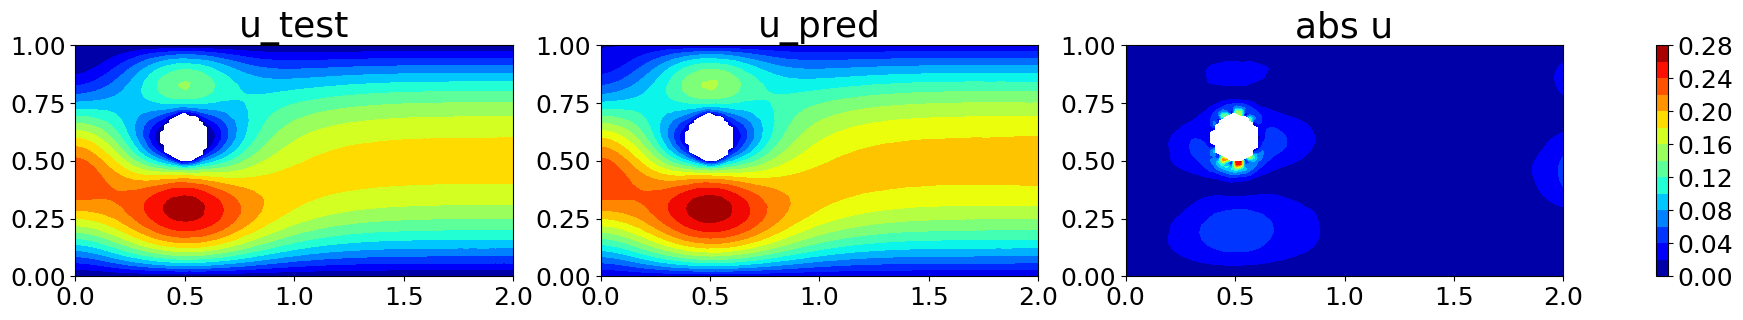

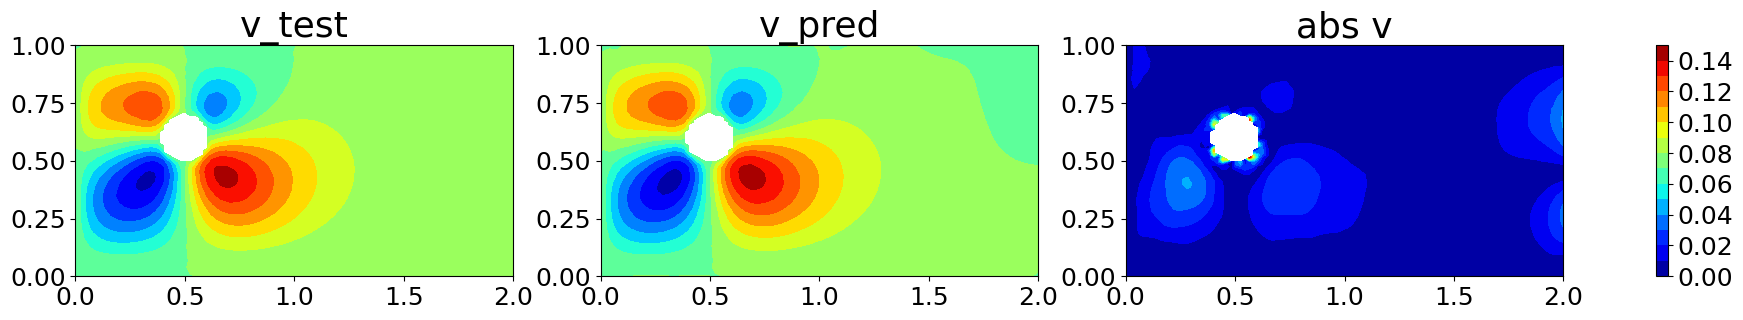

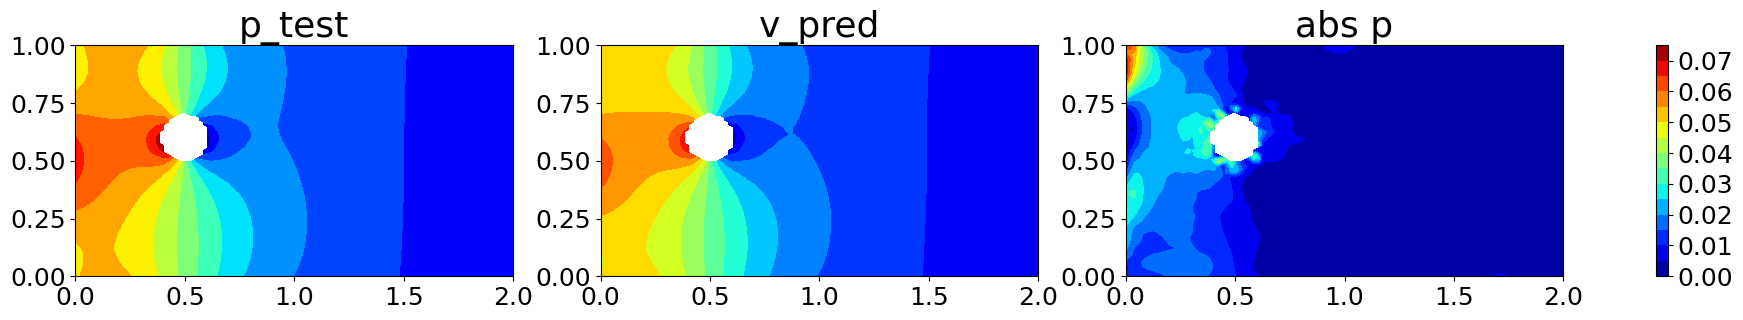

In [4]:
# #####################################
# # Load the trained model
# #####################################
from Solvers.DGNO import DGNO
solver = DGNO.Solver(device=device, dtype=dtype)
model_trained = solver.loadModel(path=f'saved_models/DGNO_latent{beta_size}/', 
                                 name=f'model_dgno_final')

###############################
# make prediction
###############################
def get_values(x, beta):
    psi = model_trained['psi'](x, beta).unsqueeze(-1)
    dpsi = grad(inputs=x, outputs=psi, grad_outputs=torch.ones_like(psi), 
                create_graph=True)[0]
    u, v = dpsi[...,1:2], -dpsi[...,0:1]
    p = model_trained['p'](x, beta).unsqueeze(-1)
    
    return u, v, p
#
x_var = Variable(x_test.to(device), requires_grad=True)
beta_pred = model_trained['enc'](a_test.to(device))
u_pred, v_pred, p_pred = get_values(x_var, beta_pred)
#
u_pred = u_pred.detach().cpu()
v_pred = v_pred.detach().cpu()
p_pred = p_pred.detach().cpu()
u_test, v_test, p_test = uvp_test[...,0:1], uvp_test[...,1:2], uvp_test[...,2:3]
#
print('The l2 error u is:', solver.getError(u_pred, u_test))
print('The l2 error v is:', solver.getError(v_pred, v_test))
print('The l2 error p is:', solver.getError(p_pred, p_test))
######################################################
from Utils.PlotFigure import Plot
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
#
xx, yy = np.meshgrid(np.linspace(0, 2.,100), np.linspace(0., 1., 100))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,3))
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(u_test[inx]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr0 = axs[0].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[0].set_title('u_test')
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(u_pred[inx]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr0 = axs[1].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[1].set_title('u_pred')
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(torch.abs(u_pred[inx]-u_test[inx])), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr0 = axs[2].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[2].set_title('abs u')
plt.colorbar(cntr0, ax=axs)
#
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,3))
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(v_test[inx]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr1 = axs[0].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[0].set_title('v_test')
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(v_pred[inx]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr1 = axs[1].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[1].set_title('v_pred')
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(torch.abs(v_pred[inx]-v_test[inx])), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr1 = axs[2].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[2].set_title('abs v')
plt.colorbar(cntr1, ax=axs)
#
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,3))
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(p_test[inx]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr1 = axs[0].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[0].set_title('p_test')
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(p_pred[inx]), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr1 = axs[1].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[1].set_title('v_pred')
z_plot = griddata((gridx[:,0], gridx[:,1]), np.ravel(torch.abs(p_pred[inx]-p_test[inx])), (xx, yy), method='linear')
z_plot[(xx-0.5)**2+(yy-0.6)**2<0.1**2] = np.nan
cntr1 = axs[2].contourf(xx, yy, z_plot, levels=14, cmap='jet')
axs[2].set_title('abs p')
plt.colorbar(cntr1, ax=axs)
#############################################
# show loss
# loss_saved = solver.loadLoss(path=f'saved_models/DGNO_latent{beta_size}/', name='loss_dgno')
# Plot.show_loss([loss_saved['loss_train'], loss_saved['loss_test'], loss_saved['loss_data'], loss_saved['loss_pde']], 
#                ['loss_train', 'loss_test', 'loss_data', 'loss_pde'])
# # show error
# Plot.show_error([loss_saved['time']]*2, [loss_saved['error'][:,0], loss_saved['error'][:,1]], 
#                 ['l2_test u', 'l2_test v'])